In [440]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')

In [441]:
df=pd.read_excel('Data_train.xlsx')

In [442]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


We have 106883 rows and 11 columns

In [443]:
dft=pd.read_excel('Test_set.xlsx')

In [444]:
dft

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


We have 2671 and 10 columns.

In [445]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [446]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are na values in route and total stops.

In [447]:
dft.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in test data.

In [448]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In the price section we have 9087 as mean with a standard deviation os 4611.35 and the minimum ticket price is 1759 and 79512 is the maximum price for the ticket.

There is a significant difference in 75% and max.

Converting the Date_of_journey into date, month and year.

In [449]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

Changing the same in test as well.

In [450]:
dft['year'] = pd.DatetimeIndex(dft['Date_of_Journey']).year
dft['month'] = pd.DatetimeIndex(dft['Date_of_Journey']).month
dft['Day'] = pd.DatetimeIndex(dft['Date_of_Journey']).day

Now let us remove the date column from the data.

In [451]:
df=df.drop(columns='Date_of_Journey')
dft=dft.drop(columns='Date_of_Journey')


As we only have one data out of the 10K around rows, we can remove that row.

In [452]:
df.dropna(axis = 0, inplace = True)

Removing the stops to 1 2 or 3, etc..

In [453]:
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]
dft['Total_Stops'] = dft['Total_Stops'].str.split().str[0]

In [454]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [455]:
df['Total_Stops'].value_counts()

1           5625
non-stop    3491
2           1520
3             45
4              1
Name: Total_Stops, dtype: int64

In [456]:
dft['Total_Stops'].value_counts()

1           1431
non-stop     849
2            379
3             11
4              1
Name: Total_Stops, dtype: int64

We have 3491 in train for non stop and 849 in test data.

In [457]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop'],0)

In [458]:
dft['Total_Stops'] = dft['Total_Stops'].replace(['non-stop'],0)

In [459]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,2019,1,3


In [460]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [461]:
dft['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

Here we have converted the non stop values into 0-5

Now let us work with the departure and arrival time.

In [462]:
df["Departure hour"]= pd.to_datetime(df.Dep_Time).dt.hour
df["Departure minute"]= pd.to_datetime(df.Dep_Time).dt.minute
df["Arrival hour"]= pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival minute"]= pd.to_datetime(df.Arrival_Time).dt.minute
df=df.drop(columns="Dep_Time")
df=df.drop(columns="Arrival_Time")

Same for test as well

In [463]:
dft["Departure hour"]= pd.to_datetime(dft.Dep_Time).dt.hour
dft["Departure minute"]= pd.to_datetime(dft.Dep_Time).dt.minute
dft["Arrival hour"]= pd.to_datetime(dft.Arrival_Time).dt.hour
dft["Arrival minute"]= pd.to_datetime(dft.Arrival_Time).dt.minute
dft=dft.drop(columns="Dep_Time")
dft=dft.drop(columns="Arrival_Time")

In [464]:
df['year'].value_counts()

2019    10682
Name: year, dtype: int64

As there is only one data in year, we can remove the year column.

In [465]:
df=df.drop(columns='year')
dft=dft.drop(columns='year')

In [466]:
dft

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1,No info,6,3,4,0,19,15


Let us work with the duration column now.

In [467]:
# creating a list Duration

duration = list(df['Duration'])



In [468]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

Here we will create a separate list for duration and then use a for loop to get the lenght and split the data to hours and minutes. then create a new list of duration hours and minutes nand then use a for loop again to get the hours and minutes to separate columns in dataframe.

In [469]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'm' in duration[i]:
            duration[i] = '0h' + duration[i]
        else:
            duration[i] = duration[i] + '0m'
            
    
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'h')[1].split('m')[0]))
    
df['duration_hour'] = duration_hours
df['duration_minute'] = duration_minutes

In [470]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,11,30,14,10,2,40


Using the same for test data as well.

In [471]:
duration_test = list(dft['Duration'])

In [472]:
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:
        if 'm' in duration_test[i]:
            duration_test[i] = '0h' + duration_test[i]
        else:
            duration_test[i] = duration_test[i] + '0m'
            
    
duration_hours_test = []
duration_minutes_test = []

for i in range(len(duration_test)):
    duration_hours_test.append(int(duration_test[i].split(sep = 'h')[0]))
    duration_minutes_test.append(int(duration_test[i].split(sep = 'h')[1].split('m')[0]))
    
dft['duration_hour'] = duration_hours_test
dft['duration_minute'] = duration_minutes_test

In [473]:
dft

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,3,27,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1,No info,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1,No info,6,3,4,0,19,15,15,15


As we have number of stops available in the data, so there is no relevance for the route as the number of stops will get updated automatically.

We will remove the column route from the data as well ass duration as we have the split data for the same.

In [474]:
df=df.drop(columns=['Route','Duration'])
dft=dft.drop(columns=['Route','Duration'])

In [475]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,2,40


Now we have a clean data, let us ahead to get some inference from using visualisation.

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


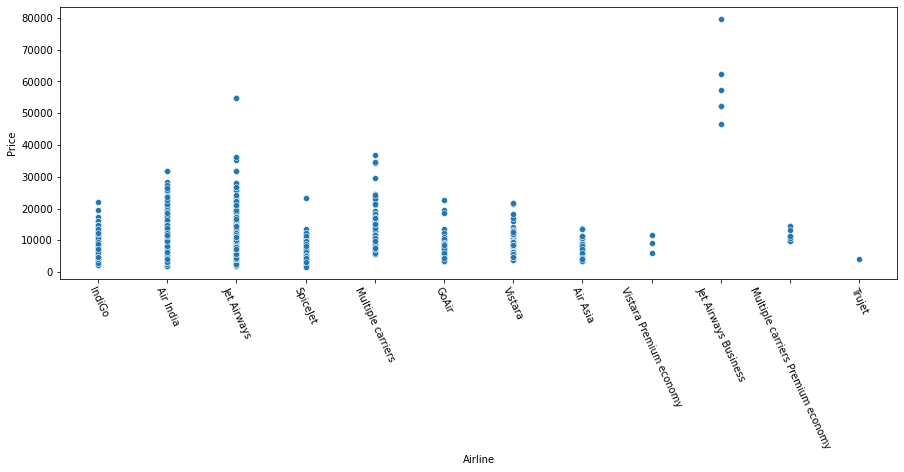

In [476]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Airline',y='Price',data=df)
plt.xticks(rotation = -65, fontsize = 10)
print(df['Airline'].value_counts())
plt.show()

As per the details that we have we see here thatt Jet Airways business is having the highest amount which is quite obvious.

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64


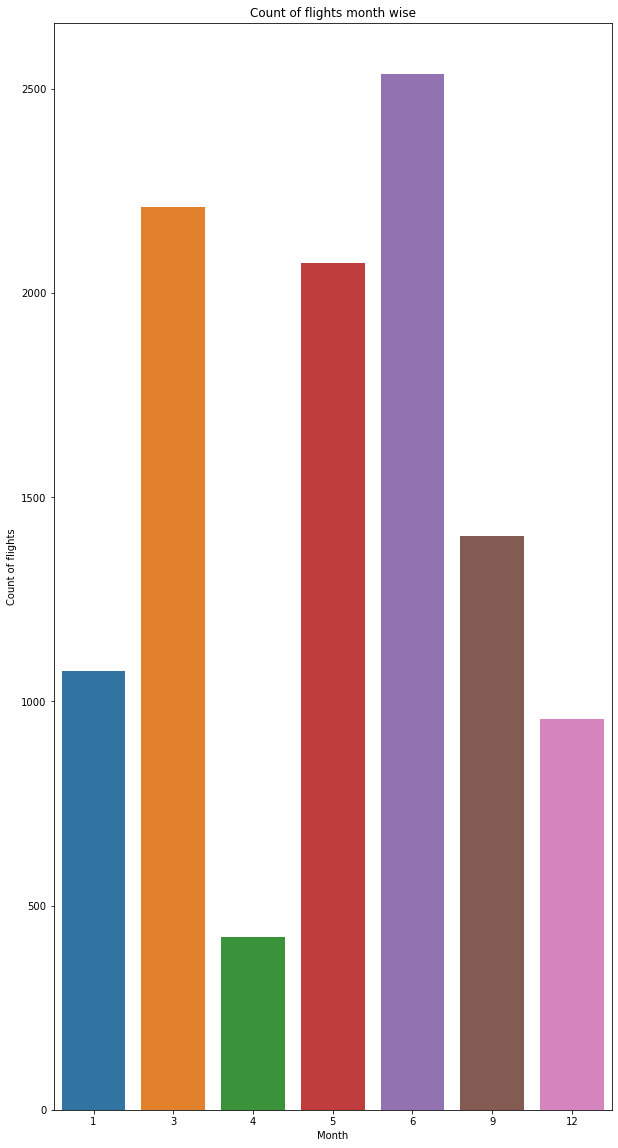

In [477]:
plt.figure(figsize = (10 , 20))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
print(df['month'].value_counts())

We have 2535 planes flying in the 6th month and only 424 in the 4th moth so 6th month can be considered as peak month for airlines.

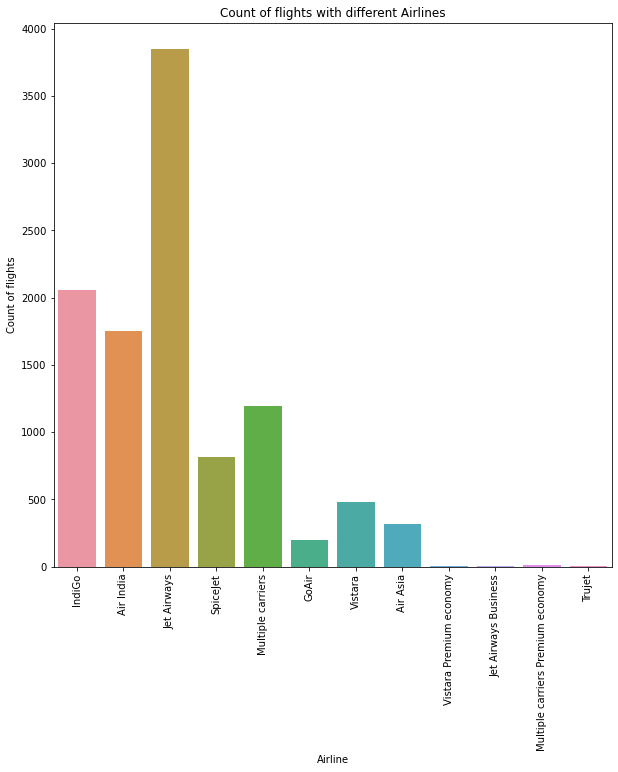

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [478]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()
print(df['Airline'].value_counts())

We see here that Jet Airways is making the most run compared to others that is 3849.

Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights, though Jet Airways is having high price can cause the flights to reduce.

Let us try to get the timings of the flight.

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Departure hour, dtype: int64


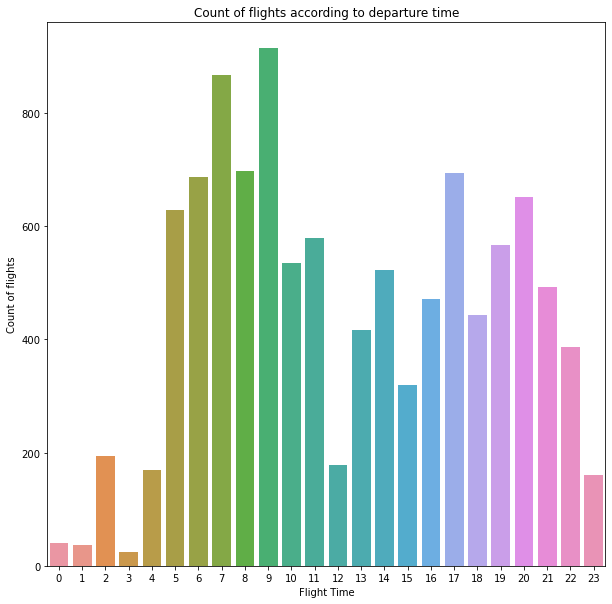

In [479]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'Departure hour', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')
print(df['Departure hour'].value_counts())

We see here that most of the flights that we have comes in late morning and very less in early morning.

Text(0, 0.5, 'Price of ticket')

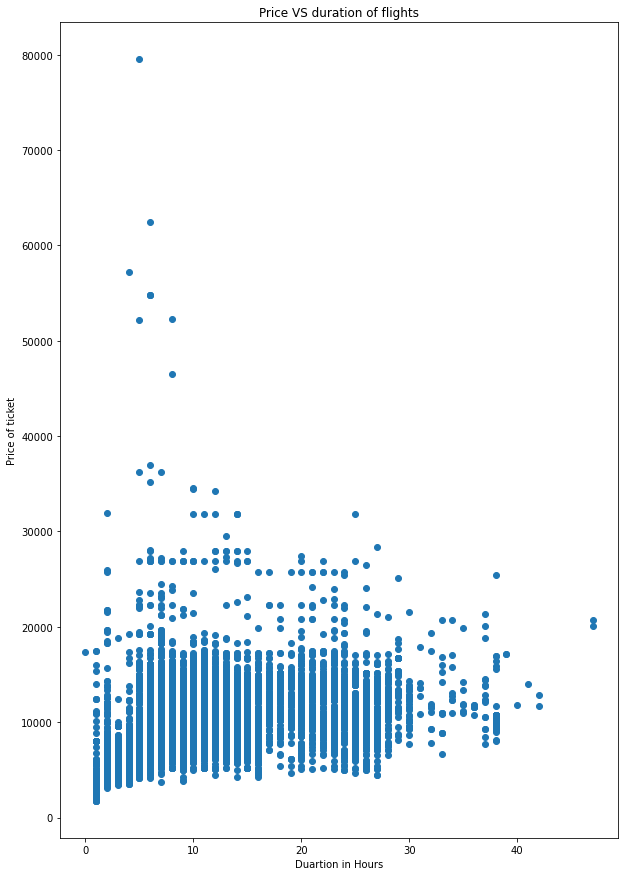

In [480]:
plt.figure(figsize = (10, 15))
plt.title('Price VS duration of flights')
plt.scatter(df['duration_hour'], df['Price'])
plt.xlabel('Duartion in Hours')
plt.ylabel('Price of ticket')

It's an obvious data as we see here that with the lesser duration, the amount increases.

That could be possibly because there are not much stops in between and that is the reason the price is pretty high for these.

In [481]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'month', 'Day', 'Departure hour', 'Departure minute',
       'Arrival hour', 'Arrival minute', 'duration_hour', 'duration_minute'],
      dtype='object')

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


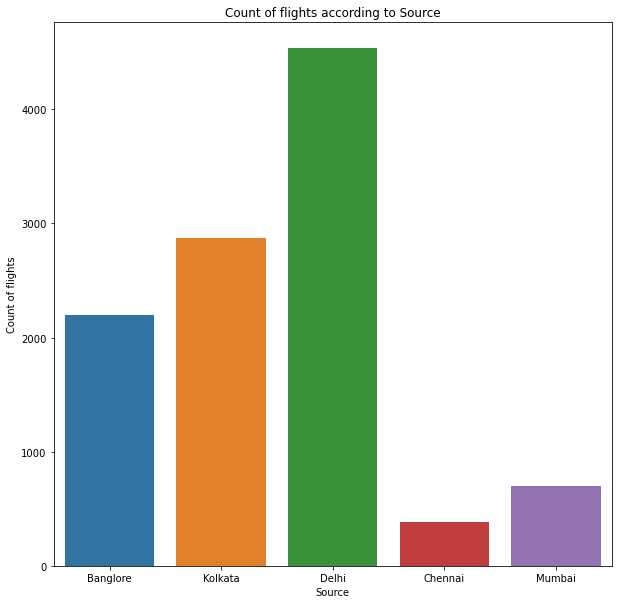

In [482]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to Source')
sns.countplot(x = 'Source', data = df)
plt.xlabel('Source')
plt.ylabel('Count of flights')
print(df['Source'].value_counts())

We mainly have 5 sources wherein most number of flights are taken from Delhi and least from Chennai.

Let us check the details of additional info as well.

In [483]:
print(df['Additional_Info'].value_counts())

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


From the 10K data, we only have few rows with additional infor and 8344 are those which are not having any info, so we can consider removing the data.

In [484]:
df=df.drop(columns='Additional_Info')
dft=dft.drop(columns='Additional_Info')

In [485]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'month',
       'Day', 'Departure hour', 'Departure minute', 'Arrival hour',
       'Arrival minute', 'duration_hour', 'duration_minute'],
      dtype='object')

Text(0, 0.5, 'Price of ticket')

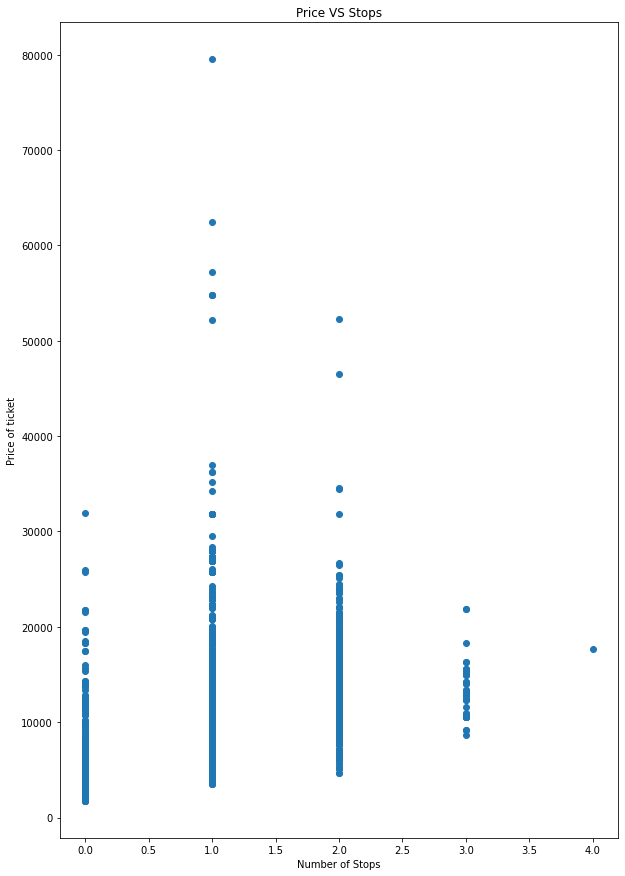

In [486]:
plt.figure(figsize = (10, 15))
plt.title('Price VS Stops')
plt.scatter(df['Total_Stops'], df['Price'])
plt.xlabel('Number of Stops')
plt.ylabel('Price of ticket')

As we see from the data, the flights having atleast one stops will have more price than others.

As we have now got how the data behaves, let us go ahead to encode the data and move ahead.

Correlation

<AxesSubplot:>

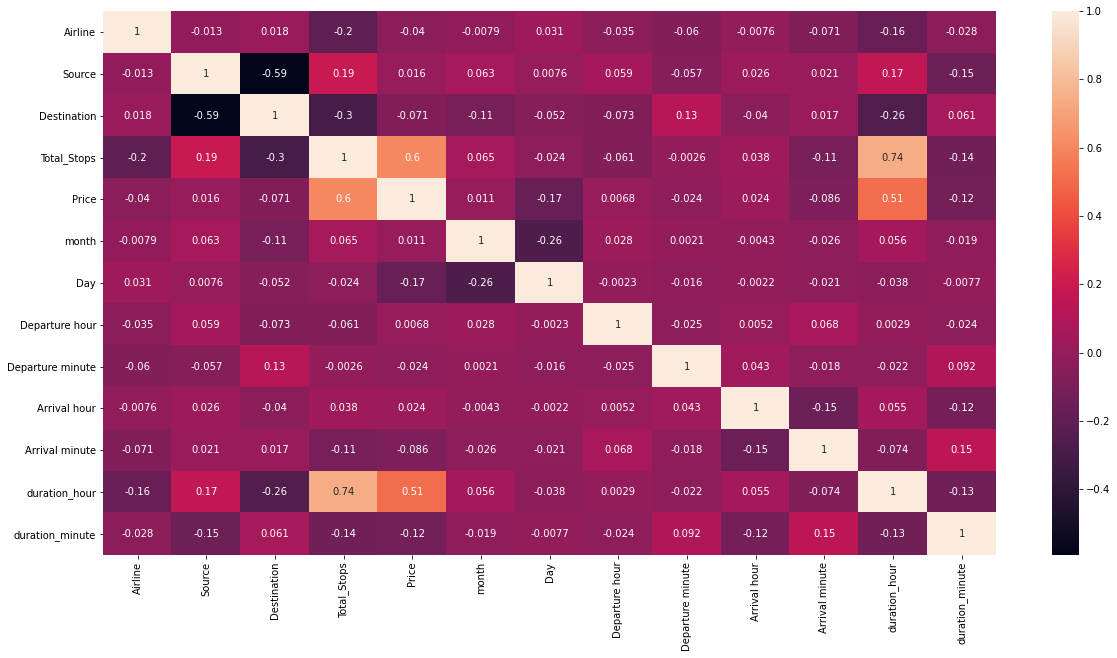

In [504]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Duration hours is highly correlated to Price and total stops.

Price and total stops are positively correlated.

There is a negative correlation between Destination and source which is quite obvious lol!

Encoding

In [487]:
from sklearn.preprocessing import OrdinalEncoder

In [488]:
enc=OrdinalEncoder()


In [489]:
df.dtypes


Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
month                int64
Day                  int64
Departure hour       int64
Departure minute     int64
Arrival hour         int64
Arrival minute       int64
duration_hour        int64
duration_minute      int64
dtype: object

Let us change the total stops into int

In [490]:
df['Total_Stops']=df['Total_Stops'].astype(int)
dft['Total_Stops']=dft['Total_Stops'].astype(int)


In [491]:
df.dtypes


Airline             object
Source              object
Destination         object
Total_Stops          int32
Price                int64
month                int64
Day                  int64
Departure hour       int64
Departure minute     int64
Arrival hour         int64
Arrival minute       int64
duration_hour        int64
duration_minute      int64
dtype: object

Encoding

In [492]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [493]:
for i in dft.columns:
    if dft[i].dtypes == 'object':
        dft[i] = enc.fit_transform(dft[i].values.reshape(-1,1))

In [494]:
df.dtypes

Airline             float64
Source              float64
Destination         float64
Total_Stops           int32
Price                 int64
month                 int64
Day                   int64
Departure hour        int64
Departure minute      int64
Arrival hour          int64
Arrival minute        int64
duration_hour         int64
duration_minute       int64
dtype: object

Let us split the data to x and y.

In [495]:
x=df.drop(columns='Price')
y=df['Price']

In [496]:
dft

,Airline,Source,Destination,Total_Stops,month,Day,Departure hour,Departure minute,Arrival hour,Arrival minute,duration_hour,duration_minute
0,4.0,2.0,1.0,1,6,6,17,30,4,25,10,55
1,3.0,3.0,0.0,1,12,5,6,20,10,20,4,0
2,4.0,2.0,1.0,1,5,21,19,15,19,0,23,45
3,6.0,2.0,1.0,1,5,21,8,0,21,0,13,0
4,0.0,0.0,2.0,0,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,1,6,6,20,30,20,25,23,55
2667,3.0,3.0,0.0,0,3,27,14,20,16,55,2,35
2668,4.0,2.0,1.0,1,6,3,21,50,4,25,6,35
2669,1.0,2.0,1.0,1,6,3,4,0,19,15,15,15


In [497]:
x.shape

(10682, 12)

In [498]:
y.shape

(10682,)

As we do have almost all the data in categorical variable, we do not have to consider removing outliers from the data.

Also the standardisation is not required here in this case.

## Modelling

In [506]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [508]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [509]:
model = [lr,dtr, svr,knr, ls, rd,rfr, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_train=m.predict(x_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Accuracy score for the training : ',r2_score(y_train,pred_train))
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.43238934223237324
Accuracy score for the training :  0.43238934223237324
Mean absolute error:  2506.174111302367
Mean squared error:  12845917.861354372
Root mean squared error:  3584.1202353373096
R2 Score:  0.4167455858432534



DecisionTreeRegressor()
Score:  0.9741037744826405
Accuracy score for the training :  0.9741037744826405
Mean absolute error:  1432.051128445138
Mean squared error:  7128186.394651066
Root mean squared error:  2669.8663626951566
R2 Score:  0.6763527352047104



SVR()
Score:  0.004457485208485212
Accuracy score for the training :  0.004457485208485212
Mean absolute error:  3563.6962633978496
Mean squared error:  22025694.42086915
Root mean squared error:  4693.153995009023
R2 Score:  -5.181681000676619e-05



KNeighborsRegressor()
Score:  0.7414362642657424
Accuracy score for the training :  0.7414362642657424
Mean absolute error:  1866.4097347893915
Mean squared error:  9061710.283407176
Root mean squared error:  3010.267477053688

In [510]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr,dtr, svr,knr, ls, rd,rfr, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        test_accuracy = r2_score(y_test, pred)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LinearRegression()
At cross fold 2 the cv score is 0.4256099966291353



At cross fold 3 the cv score is 0.4261493043968267



At cross fold 4 the cv score is 0.42587107935560775



At cross fold 5 the cv score is 0.42652545872177805



At cross fold 6 the cv score is 0.4279638277519895



At cross fold 7 the cv score is 0.4280530438620053



At cross fold 8 the cv score is 0.4271843389330361



At cross fold 9 the cv score is 0.42918168872664625



The model is: 
 DecisionTreeRegressor()
At cross fold 2 the cv score is 0.6181319148635158



At cross fold 3 the cv score is 0.6390944725111559



At cross fold 4 the cv score is 0.6521526530173174



At cross fold 5 the cv score is 0.6643281797987847



At cross fold 6 the cv score is 0.6642263680398734



At cross fold 7 the cv score is 0.6664123049068115



At cross fold 8 the cv score is 0.6429689086336222



At cross fold 9 the cv score is 0.6603395026660102



The model is: 
 SVR()
At cross fold 2 the cv score is -0.0

As per the details that we had checked, we see here that Random forest is predicting best at cv 4.

Training: 95.3

Testing: 78.7
    
At cv=4  78.4

In [512]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr =rfr.predict(x_test)


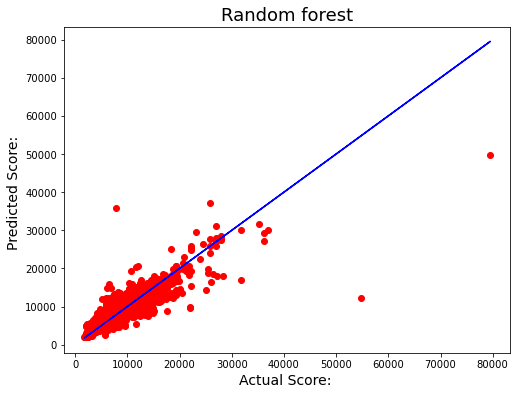

In [513]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

Grid search

In [518]:
from sklearn.model_selection import GridSearchCV

param = {'criterion':['mse','mae'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30],'min_samples_split' : [2,4,8]}

modelrfr = RandomForestRegressor()

grids = GridSearchCV(modelrfr,param,cv=4)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Best Score:  0.7997722259454678


In [523]:
rfr=RandomForestRegressor(n_estimators=30,criterion='mse',max_features='sqrt',min_samples_split=8)

In [524]:
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
predrfr = rfr.predict(x_test)
data = [predrfr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,3195,3196,3197,3198,3199,3200,3201,3202,3203,3204
Predicted,8092.242407,11045.240191,7842.923515,6903.330362,11352.808968,4104.479863,8024.050093,4814.392468,11412.725677,10682.607201,...,4041.032455,4193.838549,17211.914069,2477.867373,10635.966174,4671.627568,11471.729538,9942.979223,7441.481791,9710.291867
Actual,6643.000000,10844.000000,5608.000000,6528.000000,14388.000000,4591.000000,7335.000000,4823.000000,10844.000000,12853.000000,...,3419.000000,3815.000000,22153.000000,2227.000000,11789.000000,5644.000000,12074.000000,11602.000000,5583.000000,5511.000000


In [525]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr))
print('Mean squared error: ', mean_squared_error(y_test,predrfr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr))

Errors:


Mean absolute error:  1286.2970707503857
Mean squared error:  4732053.844919421
Root mean squared error:  2175.328445297266


R2 Score:  0.7851464315072566


78.5 % looks like a pretty decent score.

Saving the model

In [527]:
joblib.dump(rfr, 'pricerfr.obj')

['pricerfr.obj']

Reimporting the model


In [528]:
testing=joblib.load('pricerfr.obj')

In [530]:
testprediction=testing.predict(dft)

In [531]:
pd.DataFrame(testprediction)

,0
0,10861.258874
1,4469.510798
2,13981.036610
3,10599.806352
4,3907.333296
...,...
2666,10442.029570
2667,5503.651290
2668,16326.825046
2669,12782.788045


...........................................x.................................................................